In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing Libraries
import os
import numpy as np
from PIL import Image
import pandas as pd
import sys
from skimage.io import imread
import zipfile
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Define paths
zip_file_path = "/content/drive/MyDrive/Colab Notebooks/mnist.zip"
extract_to = "/content/sample_data"

def extract_with_progress(zip_file_path, extract_to):
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        file_count = len(zip_ref.infolist())
        for file in tqdm(zip_ref.infolist(), total=file_count, desc="Extracting", unit="file"):
            zip_ref.extract(file, extract_to)

# Extract files
extract_with_progress(zip_file_path, extract_to)
print("Extraction completed!")

Extracting: 100%|██████████| 372477/372477 [00:45<00:00, 8259.91file/s] 


Extraction completed!


In [ ]:
path_to_folders = '/content/sample_data/New folder'

image_data = []


folder_names = [chr(ord('A') + i) for i in range(26)]
total_folders = len(folder_names)

for i, folder_name in enumerate(folder_names):
    folder_path = os.path.join(path_to_folders, folder_name)
    for image_name in os.listdir(folder_path):
        if image_name.endswith('.png'):
            image_path = os.path.join(folder_path, image_name)
            image_array = np.array(Image.open(image_path))
            flat_image_array = image_array.flatten().tolist()
            image_data.append([folder_name] + flat_image_array)

    progress = (i + 1) / total_folders * 100
    sys.stdout.write('\r')
    sys.stdout.write(f'Progress: {progress:.2f}%')
    sys.stdout.flush()

num_pixels = len(image_data[0]) - 1
column_names = ['Label'] + [f'pixel_{i}' for i in range(num_pixels)]
df = pd.DataFrame(image_data, columns=column_names)

df.head()

Progress: 100.00%

,Label,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,...,pixel_774,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783
0,A,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,A,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,A,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,A,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,A,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372451 entries, 0 to 372450
Columns: 785 entries, Label to pixel_783
dtypes: int64(784), object(1)
memory usage: 2.2+ GB


In [ ]:
df.to_csv('image_data_flat.csv', index=False)

In [ ]:
df.head()

,Label,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,...,pixel_774,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783
0,A,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,A,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,A,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,A,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,A,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
## Exploratory Data Analysis

In [ ]:
df.shape

(372451, 785)

In [ ]:
df.Label.value_counts().sort_index()

Label
A    13870
B     8668
C    23409
D    10134
E    11440
F     1163
G     5762
H     7218
I     1120
J     8493
K     5603
L    11586
M    12336
N    19010
O    57825
P    19341
Q     5812
R    11566
S    48419
T    22495
U    29008
V     4182
W    10784
X     6272
Y    10859
Z     6076
Name: count, dtype: int64

<Axes: xlabel='Label', ylabel='count'>

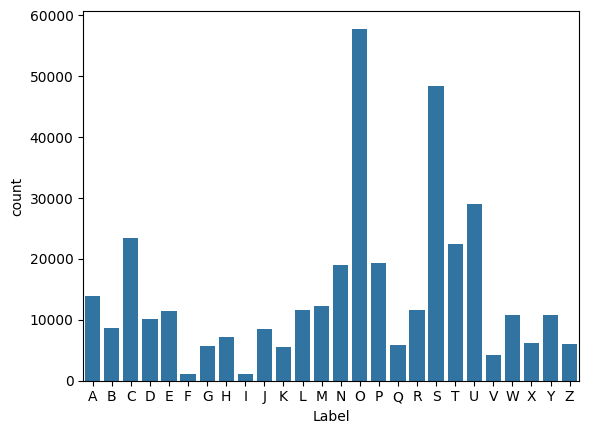

In [ ]:
sns.countplot(data=df, x='Label')

**Observation:**
From the above countplot we can see that letter "O" has more number of images

In [ ]:
## Data set seggregation

In [ ]:
y=df["Label"]
x=df.drop(columns="Label")

In [ ]:
first_img=x.loc[df.index[0]]
first_img

pixel_0      0
pixel_1      0
pixel_2      0
pixel_3      0
pixel_4      0
            ..
pixel_779    0
pixel_780    0
pixel_781    0
pixel_782    0
pixel_783    0
Name: 0, Length: 784, dtype: int64

In [ ]:
import numpy as np
image_pix=np.array(first_img)
image_pix

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,  65, 171, 255, 192,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0, 120, 255, 177, 215, 215,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

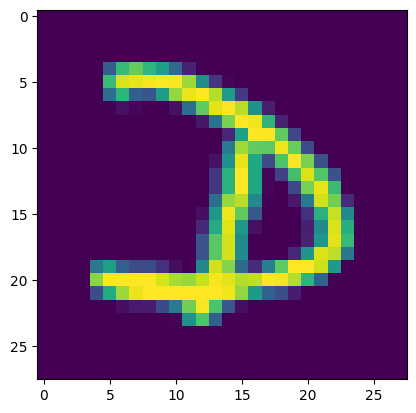

In [ ]:
restore=image_pix.reshape(28,28,1)
plt.imshow(restore)

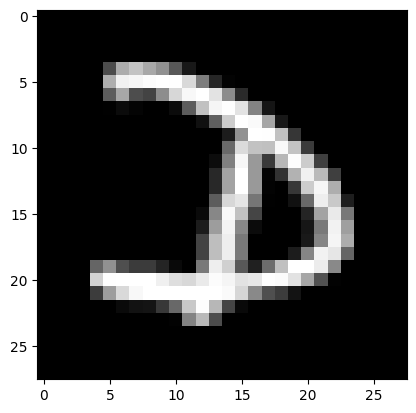

In [ ]:
plt.imshow(restore,cmap="gray")

In [ ]:
import numpy as np
np.random.seed(42)
imgs=np.random.randint(0,372450,9)
print(imgs)
print(type(imgs))

[121958 146867 131932 365838 259178 119879 110268 207892  54886]
<class 'numpy.ndarray'>


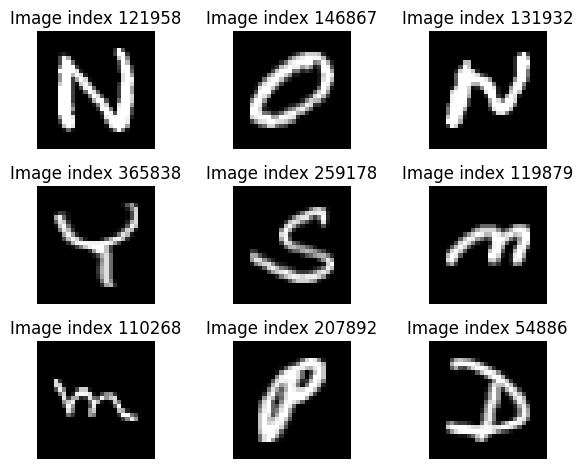

In [ ]:
import matplotlib.pyplot as pyplot
fig,axes=plt.subplots(3,3)
for i, ax in zip(imgs, axes.flatten()):
  images=x.loc[df.index[i]]
  image_pix=np.array(images)
  restore = image_pix.reshape(28, 28, 1)
  ax.imshow(restore, cmap='gray')
  ax.set_title(f'Image index {i}')
  ax.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
df.head()

,Label,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,...,pixel_774,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783
0,A,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,A,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,A,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,A,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,A,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Considering Sample data
df1=df.sample(n=20000,random_state=42)

In [ ]:
df1

,Label,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,...,pixel_774,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783
122926,N,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
270470,S,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27001,C,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
115006,M,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4997,A,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243001,S,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
369594,Z,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
271179,S,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
312227,U,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
** Data Seggregation on sample dataset**

In [ ]:
y=df1["Label"]
x=df1.drop(columns="Label")

In [ ]:
from sklearn.model_selection import train_test_split as split
x_train,x_test,y_train,y_test=split(x,y,train_size=0.75,random_state=42)

In [ ]:
**Training**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [ ]:
#Logistic regression
LR_classifier = LogisticRegression()
LR_classifier.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_test_pred_LR=LR_classifier.predict(x_test)

In [ ]:
y_test_pred_LR

array(['D', 'S', 'Z', ..., 'U', 'C', 'P'], dtype=object)

In [ ]:
metrics.accuracy_score(y_test,y_test_pred_LR)

0.8246

In [ ]:
#Decision tree
DT_classifier = DecisionTreeClassifier()
DT_classifier.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_test_pred_DT=DT_classifier.predict(x_test)

In [ ]:
y_test_pred_DT

array(['B', 'S', 'Z', ..., 'U', 'C', 'P'], dtype=object)

In [ ]:
metrics.accuracy_score(y_test,y_test_pred_DT)

0.734

In [ ]:
#svc
svm_classifier = SVC()
svm_classifier.fit(x_train,y_train)

SVC()

In [ ]:
y_test_pred_svm=svm_classifier.predict(x_test)

In [ ]:
y_test_pred_svm

array(['D', 'S', 'Z', ..., 'U', 'C', 'P'], dtype=object)

In [ ]:
metrics.accuracy_score(y_test,y_test_pred_svm)

0.9316

In [ ]:
#RANDOMFOREST CLASSIFIER
RF_classifier = RandomForestClassifier()
RF_classifier.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
y_test_pred_RF=RF_classifier.predict(x_test)

In [ ]:
y_test_pred_RF

array(['D', 'S', 'Z', ..., 'U', 'C', 'P'], dtype=object)

In [ ]:
metrics.accuracy_score(y_test,y_test_pred_RF)

0.9122

In [ ]:
#KNN CLASSIFIER
KNN_classifier = KNeighborsClassifier()
KNN_classifier.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
y_test_pred_KNN=KNN_classifier.predict(x_test)

In [ ]:
y_test_pred_KNN

array(['L', 'S', 'Z', ..., 'U', 'C', 'P'], dtype=object)

In [ ]:
metrics.accuracy_score(y_test,y_test_pred_KNN)

0.889

In [ ]:
d={
    "Algo":["Logistic Regression","DecisionTreeClassifier"," SVC","RandomForestClassifier","KNeighborsClassifier"],
    "Accuracy_score":[0.819,0.7198,0.934,0.9076,0.893]
}
pd.DataFrame(d)

,Algo,Accuracy_score
0,Logistic Regression,0.8190
1,DecisionTreeClassifier,0.7198
2,SVC,0.9340
3,RandomForestClassifier,0.9076
4,KNeighborsClassifier,0.8930


In [ ]:
**Insights:**
-- The SVC (Support Vector Classifier) shows the highest accuracy score at 0.9340. Therefore, based on the metric of accuracy    alone, the SVC is the best-fitted model among those listed.